# Fatores Ligados ao Estresse dos Estudantes

## Sobre a Análise e o Conjunto de Dados:

A análise a seguir foi feita com o objetivo de conectar fatores do cotidiano dos estudantes, que participaram da pesquisa, ao estresse que eles vivem. Os dados são compostos por 20 campos de fatores que podem impactar na condição estressante. Serão abordados 5 categorias de causas, sendo elas, acadêmicas, ambientais, fisiológicas, psicológicas e sociais. Dentro de cada uma dessas categorias, poderemos analisar o sono, histórico de ansiedade e depressão, e até mesmo, se o estudante já sofreu bullying.

Essa análise é mais simples e geral, podendo, com seus resultados, gerar o interesse de entrar mais a fundo no assunto, e investigar, de forma detalhada, as causas do estresse nos estudantes.

## Categorias de Fatores:

* Fatores Acadêmicos:
    
    - Performance Acadêmica;
    - Empréstimo Estudantil;
    - Relação entre Professor e Estudante;
    - Preocupações Futuras com a Carreira.  
   
 --
    
* Fatores Ambientais:

    - Nível de Barulho;
    - Condições de Moradia;
    - Segurança;
    - Necessidades Básicas.  
    
--
    
* Fatores Fisiológicos:
    
    - Dor de Cabeça;
    - Pressão Sanguínea;
    - Qualidade do Sono;
    - Problemas Respiratórios.  
    
--
  
* Fatores Psicológicos:

    - Ansiedade;
    - Autoestima;
    - Histórico de Doenças da Mente;
    - Depressão.  
    
--
  
* Fatores Sociais:

    - Apoio;
    - Pressão dos Colegas;
    - Atividades Extra-Curriculares;
    - Bullying.  
    
OBS.: Na nossa análise não usaremos todas essas informações, mas apenas aquelas que achamos relevantes paa responder às questões que serão levantadas conforme avançamos.

## Visão Geral 

Iremos iniciar nossa análise importando as bibliotecas que serão utilizadas, também importaremos o conjunto de dados e vamos procurar por dados nulos ou duplicados para serem limpos. Com essa parte feita iremos começar a responder às perguntas que estão sendo levantadas. Uma observação final é que os dados do conjunto estão em inglês, então, iremos fazer uma parte da análise na língua original.

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o conjunto de dados e visualizando os cinco primeiros valores de cada coluna
df = pd.read_csv('dados/StressLevelDataset.csv')
pd.set_option('display.max_rows', None)

df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
# Composição do conjunto de dados
df.shape

(1100, 21)

In [4]:
# Coletando informações de nome da coluna, formato dos dados e etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
# Verificando se realmente não há dados nulos
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [6]:
# Verificando se existe algum dado duplicado
df.duplicated().sum()

0

Como foi possível observar, esse conjunto de dados possui, 21 colunas e 1100 entradas/valores, além disso, podemos concluir que a maior parte dos valores presentes nas colunas estão "codificados", então, no decorrer da nossa análise, iremos atribuir os "códigos" às características de cada categoria. Os dados já estão limpos e podemos começar a trabalhar com eles.

## Estatísticas Descritivas

Nas estatísticas descritivas, vamos definir quantos estudantes temos no dataframe, qual a média do nível de ansiedade entre os estudantes, e iremos descobrir quantos alunos dizem ter algum histórico de doenças da mente.

In [7]:
# Número de estudantes no dataframe
total_estudantes = len(df)
print(f'O total de estudantes no dataframe é {total_estudantes}')

O total de estudantes no dataframe é 1100


In [8]:
# Média do nível de ansiedade dos estudantes
media_ansiedade = df['anxiety_level'].mean()
print(f'A média do nível de ansiedade dos estudantes é {media_ansiedade}')

A média do nível de ansiedade dos estudantes é 11.063636363636364


In [9]:
# Outra forma de visualizar a média
df['anxiety_level'].describe()

count    1100.000000
mean       11.063636
std         6.117558
min         0.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000
Name: anxiety_level, dtype: float64

In [10]:
# Histórico de doenças ligadas à mente
historico_doencas_mente = len(df[df['mental_health_history'] == 1]) 
print(f'O número de estudantes que informaram ter algum histórico de doenças ligadas à mente é {historico_doencas_mente}')

O número de estudantes que informaram ter algum histórico de doenças ligadas à mente é 542


Segundo a escala de ansiedade Hamilton: 
* Pontuação abaixo de 9 - Sem Ansiedade;
* De 9 a 15 - Ansiedade Temporária;
* De 16 a 25 - Ansiedade Moderada;
* Acima de 26 - Ansiedade Grave.

Esses resultados são um ótimo início para uma análise posterior mais detalhada. Porém com a escala de Hamilton e a média que obtivemos, podemos dizer que a maioria dos estudantes possuem uma ansiedade temporária. A partir deste resultado, é interessante fazer mais estudos para entender a raiz desse tipo de ansiedade nos estudantes. Além disso, quase metade dos estudantes, afirmam ter histórico de alguma doença da mente.

## Estatísticas psicológicas

Nas estatísticas psicológicas, vamos utilizar as colunas de autoestima e de depressão.

### Quantos alunos possuem autoestima abaixo da média, ou seja, baixa autoestima?

In [11]:
# Encontrando a média de autoestima
media_auto_estima = df['self_esteem'].mean()
media_auto_estima

17.777272727272727

In [12]:
# Criação de um dataframe localizando a baixa auto-estima
df_baixa_auto_estima_media = df[df['self_esteem'] < media_auto_estima]

In [13]:
baixa_autoestima = len(df_baixa_auto_estima_media)
print(f'A quantidade de estudantes que afirmam ter baixa autoestima é igual a {baixa_autoestima}')

A quantidade de estudantes que afirmam ter baixa autoestima é igual a 507


### Qual a porcentagem de alunos que dizem ter depressão?

In [14]:
# Identificando os níveis de depressão informados pelos estudantes
df['depression'].unique()

array([11, 15, 14,  7, 21,  6, 22, 12, 27, 25,  8, 24,  3,  1,  0,  5, 26,
       20, 10,  9,  2, 16,  4, 13, 18, 23, 17, 19], dtype=int64)

* PHQ-9 Score:

    - 0-4: Sem Depressão/Depressão Mínima;
    - 5-9: Depressão Leve;
    - 10-14: Depressão Moderada;
    - 15-19: Depressão Moderadamente Grave;
    - 20-27: Depressão Grave.
    
Usaremos a pontuação PHQ-9 para categorizar os estudantes que possuem depressão, e também, para visualizarmos as categorias de depressão e quantos estudantes se encaixam em cada uma.

In [15]:
# Categorizando como depressivos e não-depressivos
df['depressivos_ou_nao'] = df['depression'].apply(lambda x: 'Depressivos' if x > 4 else 'Não-Depressivos')

In [16]:
#Encontrando a porcentagem
ocorrencias_por_categoria = df['depressivos_ou_nao'].value_counts() 
porcentagem_por_categoria = (ocorrencias_por_categoria/len(df))*100
print('Alunos depressivos e não-depressivos:')
print(ocorrencias_por_categoria)
print('\nPorcentagem de alunos depressivos e não depressivos:')
print(porcentagem_por_categoria)

Alunos depressivos e não-depressivos:
depressivos_ou_nao
Depressivos        902
Não-Depressivos    198
Name: count, dtype: int64

Porcentagem de alunos depressivos e não depressivos:
depressivos_ou_nao
Depressivos        82.0
Não-Depressivos    18.0
Name: count, dtype: float64


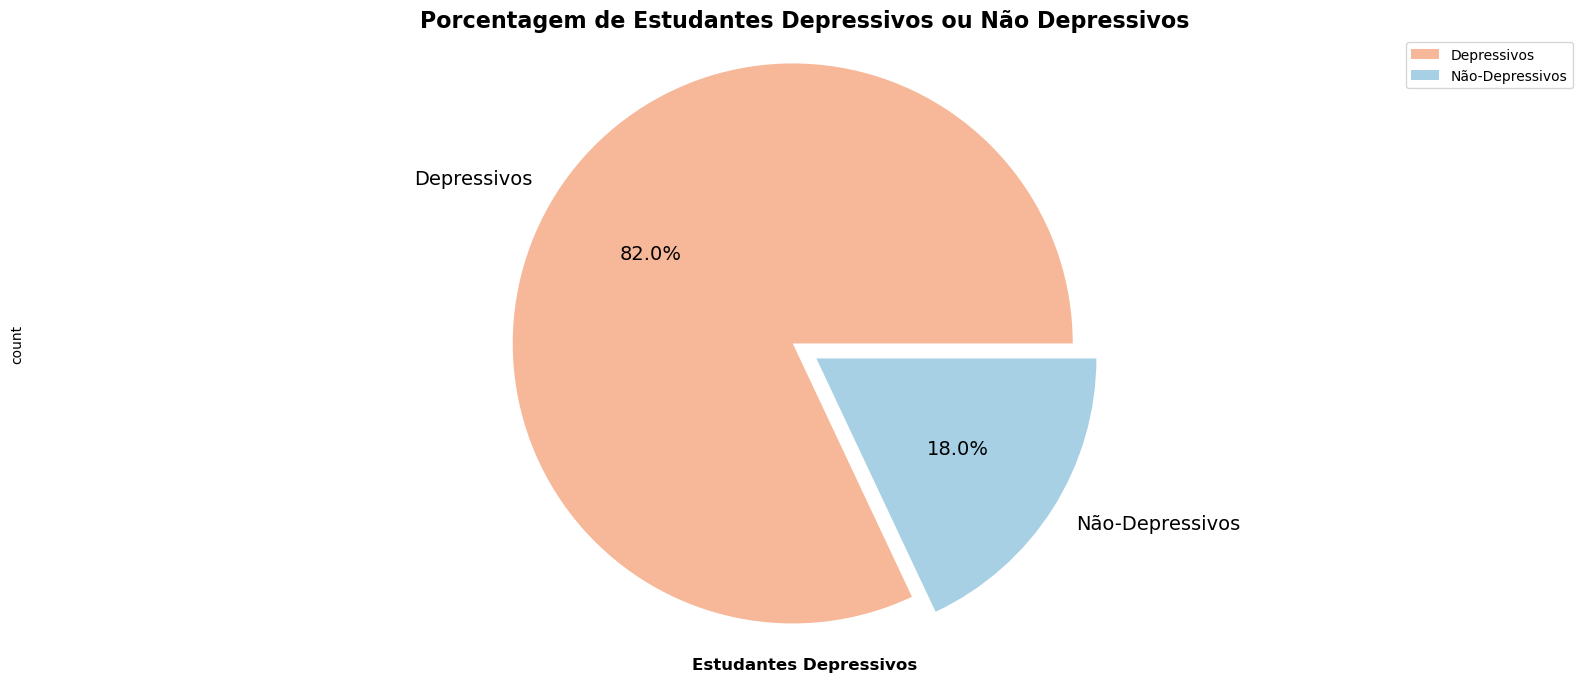

In [17]:
# Criando um gráfico para melhor visualização
plt.figure(figsize=(20,8))
espaco = (0, 0.1)
legenda = ['Depressivos', 'Não-Depressivos']

ocorrencias_por_categoria = df['depressivos_ou_nao'].value_counts() 
porcentagem_por_categoria = (ocorrencias_por_categoria/len(df))*100

porcentagem_por_categoria.plot(kind='pie', fontsize= 14, colors = sns.color_palette('RdBu', 2), explode = espaco, autopct = '%1.1f%%')
plt.xlabel('Estudantes Depressivos', weight='bold', fontsize=12)
plt.axis('equal')
plt.title('Porcentagem de Estudantes Depressivos ou Não Depressivos', weight = 'bold', fontsize= 16)
plt.legend(labels = legenda, loc = 'best')
plt.show()

Observamos que o número de estudantes que possuem depressão é expressivo, nos próximos passos iremos categorizar os tipos de depressão, mas com o que foi possível ver até aqui, são números altos e alarmantes que necessitam da nossa atenção, principalmente, com taxas altas de suícidio que temos nesta nova geração, muitas vezes causadas pela depressão que pode ser causada, também, pela pressão e pela incerteza que os estudos podem gerar.

In [18]:
# Coluna com os níveis de depressão em categorias para uma melhor visualização dos níveis informados pelos estudantes
limites = [0, 5, 10, 15, 20, 28]
categorias = ['Sem Depressão', 'Depressão Leve', 'Depressão Moderada', 'Depressão Moderadamente Grave', 'Depressão Grave']

# Colocando os limites e as categorias no coluna 'depressed_or_not' que criamos anteriormente
df['depressivos_ou_nao'] = pd.cut(df['depression'], bins = limites, labels = categorias, right=False)

In [19]:
# Identificando quantos estudantes estão em cada categoria
estudantes_com_depressao = df['depressivos_ou_nao'].value_counts().sort_index()
estudantes_com_depressao

depressivos_ou_nao
Sem Depressão                    198
Depressão Leve                   216
Depressão Moderada               295
Depressão Moderadamente Grave    137
Depressão Grave                  254
Name: count, dtype: int64

Na lista acima, conseguimos identificar que os maiores números de estudantes com depressão estão localizados nas categorias de depressão moderada (295), e na de depressão grave (254). Não é uma grande diferença dos outros números, mas são tipos de depressão que requerem um maior cuidado, principalmente, a depressão grave que é a causa de muitas mortes por suicídio.

A seguir iremos visualizar essas informações em um gráfico para melhor entendimento.

Text(0.5, 1.0, 'Número de Estudantes Depressivos por Categoria')

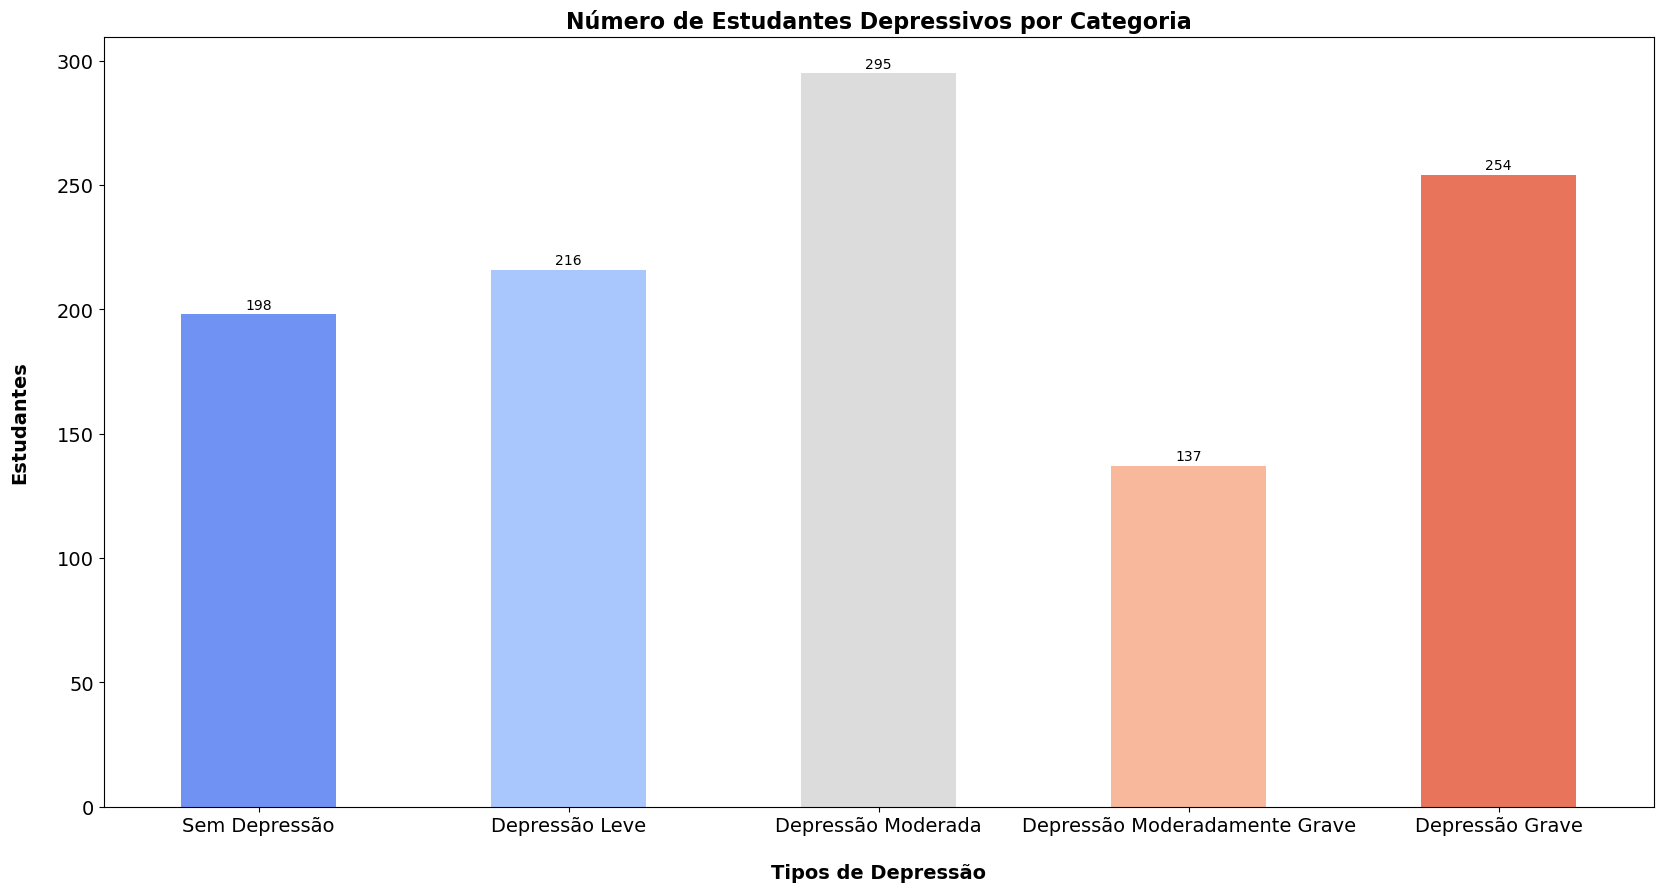

In [20]:
# Visualizando em forma de gráfico
plt.figure(figsize=(20,10))

estudantes_com_depressao = df['depressivos_ou_nao'].value_counts().sort_index().plot(kind='bar', color = sns.color_palette('coolwarm', 5), rot=0)

for p in estudantes_com_depressao.patches:
    estudantes_com_depressao.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    estudantes_com_depressao.tick_params(axis='both', labelsize=14)
    

plt.xlabel('Tipos de Depressão', weight='bold', fontsize=14, labelpad=20)
plt.ylabel('Estudantes', weight='bold', fontsize=14, labelpad=20)
plt.title('Número de Estudantes Depressivos por Categoria', weight='bold', fontsize=16)

## Fatores Fisiológicos

No caso dos fatores fisiológicos iremos analisar a frequência de dores de cabeça dos alunos e a qualidade de sono.

### Quantos alunos tem lidado com dores de cabeça frequentemente?

In [21]:
# Níveis de dor de cabeça
df['headache'].unique()

array([2, 5, 4, 3, 1, 0], dtype=int64)

In [22]:
# Estudantes com dores de cabeça frequentes
len(df[df['headache'] >=4])

269

Os níveis de dores de cabeça começam a ser frequentes quando passam da média, que neste caso, é 3. Podemos identificar que 269 alunos sentem as dores frequentemente, o que não é um número tão expressivo, mas que pode demandar uma análise mais profunda para identificar as principais causas das dores de cabeça.

### Quantos estudantes consideram a qualidade de sono deles baixa?

In [23]:
# Identificando os níveis de qualidade de sono
df['sleep_quality'].unique()

array([2, 1, 5, 4, 3, 0], dtype=int64)

* Distribuição dos níveis de qualidade de sono (conforme o conjunto de dados):

    - 0: Qualidade de sono muito baixa;
    - 1: Qualidade de sono baixa;
    - 2: Qualidade de sono abaixo da média;
    - 3: Qualidade de sono média;
    - 4: Boa qualidade de sono;
    - 5: Qualidade de sono muito boa

In [24]:
# Agora identificamos todos os estudantes com baixa qualidade de sono
baixa_qual_sono = len(df[df['sleep_quality'] <= 2])
print(f'{baixa_qual_sono} estudantes possuem uma baixa qualidade de sono.')

550 estudantes possuem uma baixa qualidade de sono.


Com a informação acima, podemos concluir que metade dos alunos que lidam com um alto estresse, não conseguem dormir da maneira correta. Descobrir o porquê da qualidade de sono ser tão baixa também pode ser assunto para uma outra análise. 

A partir dos dados que extraímos, também é possível criar um gráfico para que seja possível visualizar como é a distribuição deste fator entre os estudantes, e é isso que será feito nos próximos passos.

In [25]:
# Identificando a quantidade de alunos em cada categoria
niveis_de_sono_estudantes = df['sleep_quality'].value_counts().sort_index()
niveis_de_sono_estudantes

sleep_quality
0     34
1    328
2    188
3    170
4    188
5    192
Name: count, dtype: int64

Text(0.5, 1.0, 'Qualidade de Sono dos Estudantes')

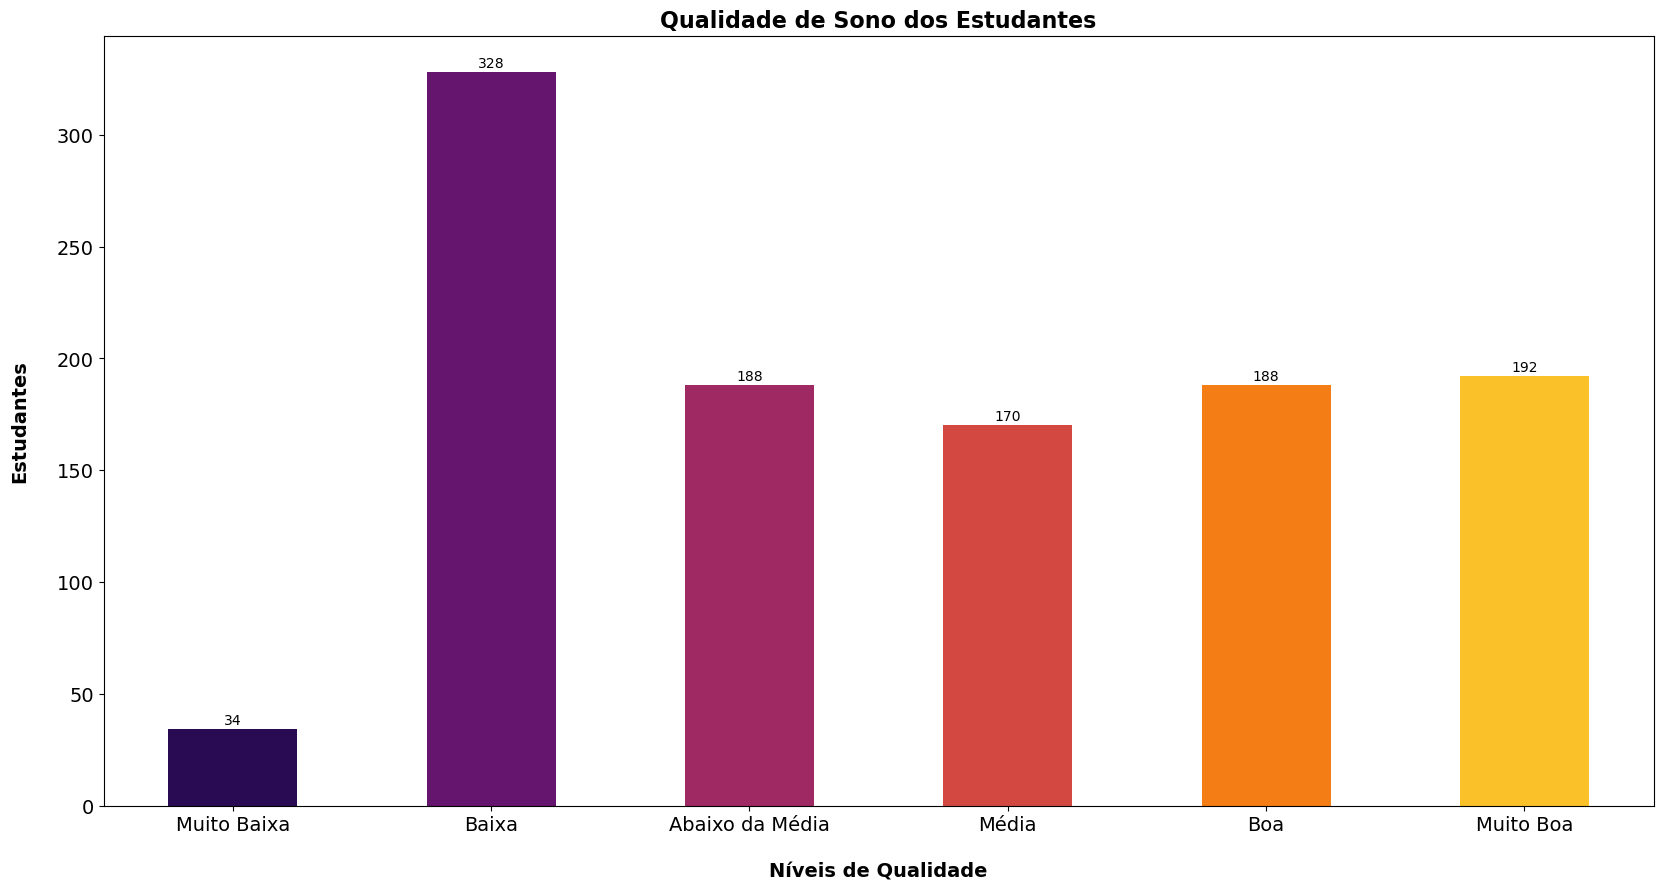

In [26]:
plt.figure(figsize=(20,10))

qualidade_sono_estudantes = df['sleep_quality'].value_counts().sort_index().plot(kind='bar', color = sns.color_palette('inferno', 6), rot = 0)
qualidade_sono_estudantes.set_xticklabels(('Muito Baixa', 'Baixa', 'Abaixo da Média', 
                                           'Média', 'Boa', 'Muito Boa'))

for p in qualidade_sono_estudantes.patches:
    qualidade_sono_estudantes.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    qualidade_sono_estudantes.tick_params(axis='both', labelsize=14)

plt.xlabel('Níveis de Qualidade', weight = 'bold', fontsize=14, labelpad=20)
plt.ylabel('Estudantes', weight='bold', fontsize=14, labelpad=20)
plt.title('Qualidade de Sono dos Estudantes', weight='bold', fontsize=16)

## Fatores do Ambiente

Os fatores do ambiente dizem respeito ao local em que o estudante vive. Para a análise dessa categoria, iremos nos aprofundar no sentimento de insegurança e na falta de necessidades básicas

### Qual a porcentagem de alunos que se sentem inseguros nas condições em que vivem?

In [27]:
# Identificando os níveis de insegurança/segurança
df['safety'].unique()

array([3, 2, 4, 1, 5, 0], dtype=int64)

* Níveis de Segurança/Insegurança:

    - 0: Muito Inseguros;
    - 1: Inseguros;
    - 2: Parcialmente Inseguros;
    - 3: Parcialmente Seguros;
    - 4: Seguros;
    - 5: Muito Seguros.

In [28]:
# Classificando como inseguros/seguros
df['inseguros_seguros'] = df['safety'].apply(lambda x: 'Inseguro' if x <= 2 else 'Seguro')

In [29]:
# Encontrando o número, e a porcentagem, de estudantes que sentem inseguros ou seguros no lugar onde vivem
estudantes_inseguros = df['inseguros_seguros'].value_counts()
estudantes_inseguros_porcentagem = (estudantes_inseguros/len(df))*100
print('Alunos inseguros/seguros:')
print(estudantes_inseguros)
print('\nPorcentagem de alunos inseguros/seguros:')
print(estudantes_inseguros_porcentagem)

Alunos inseguros/seguros:
inseguros_seguros
Inseguro    565
Seguro      535
Name: count, dtype: int64

Porcentagem de alunos inseguros/seguros:
inseguros_seguros
Inseguro    51.363636
Seguro      48.636364
Name: count, dtype: float64


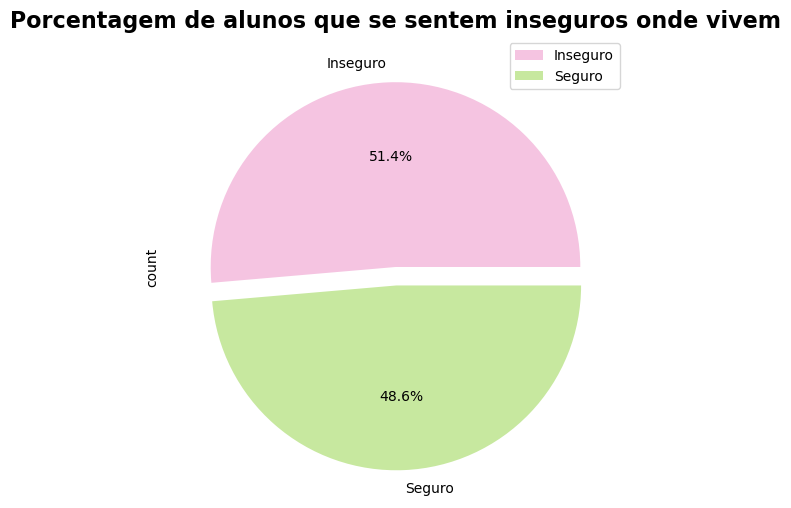

In [30]:
# Visualizando a informação em forma de gráfico
plt.figure(figsize=(30,6))
espaco = (0,0.1)
legenda = ['Inseguro', 'Seguro']

estudantes_inseguros_porcentagem.plot(kind='pie', fontsize= 10, colors = sns.color_palette('PiYG', 2), explode = espaco, autopct = '%1.1f%%')
plt.title('Porcentagem de alunos que se sentem inseguros onde vivem', weight = 'bold', fontsize= 16)
plt.legend(labels = legenda, loc = 'best')
plt.show()

Como foi possível observar quando coletamos o número e a porcentagem de estudantes que se sentem inseguros, e também pelo gráfico, um pouco mais da metade dos estudantes presentes no conjunto de dados afirmam se sentir inseguros no local em que vivem. Isso pode se dar por diversos fatores externos e internos, mas que não vem ao caso, neste momento. 

### Quantos estudantes informaram não ter acesso às suas necessidades básicas?

In [31]:
# Mais uma vez identificando os níveis da categoria
df['basic_needs'].unique()

array([2, 3, 1, 4, 5, 0], dtype=int64)

Algumas necessidades básicas para que o ser humano possa ter uma boa qualidade de vida são a hidratação, a alimentação, o sono e o oxigênio. Lembrando que anteriormente, já fomos capazes de identificar que muitos estudantes não possuem um bom sono, que é uma necessidade básica que ajuda na boa manutenção do corpo humano.


* Níveis de Acesso às Necessidades Básicas:

    - 0: Acesso Muito Baixo;
    - 1: Pouco Acesso;
    - 2: Acesso Abaixo da Média;
    - 3: Acesso na Média;
    - 4: Bom Acesso;
    - 5: Acesso Muito Bom.

In [32]:
# Quantidade de alunos que relataram uma baixa condição de acesso às necessidades básicas
baixa_condicao = len(df[df['basic_needs'] <= 2])
baixa_condicao

548

In [33]:
# Quantos alunos por categoria de acesso às necessidades básicas
niveis_necessidades_basicas = df['basic_needs'].value_counts().sort_index()
niveis_necessidades_basicas

basic_needs
0     40
1    173
2    335
3    190
4    173
5    189
Name: count, dtype: int64

Text(0.5, 1.0, 'Acesso dos Estudantes às Necessidades Básicas')

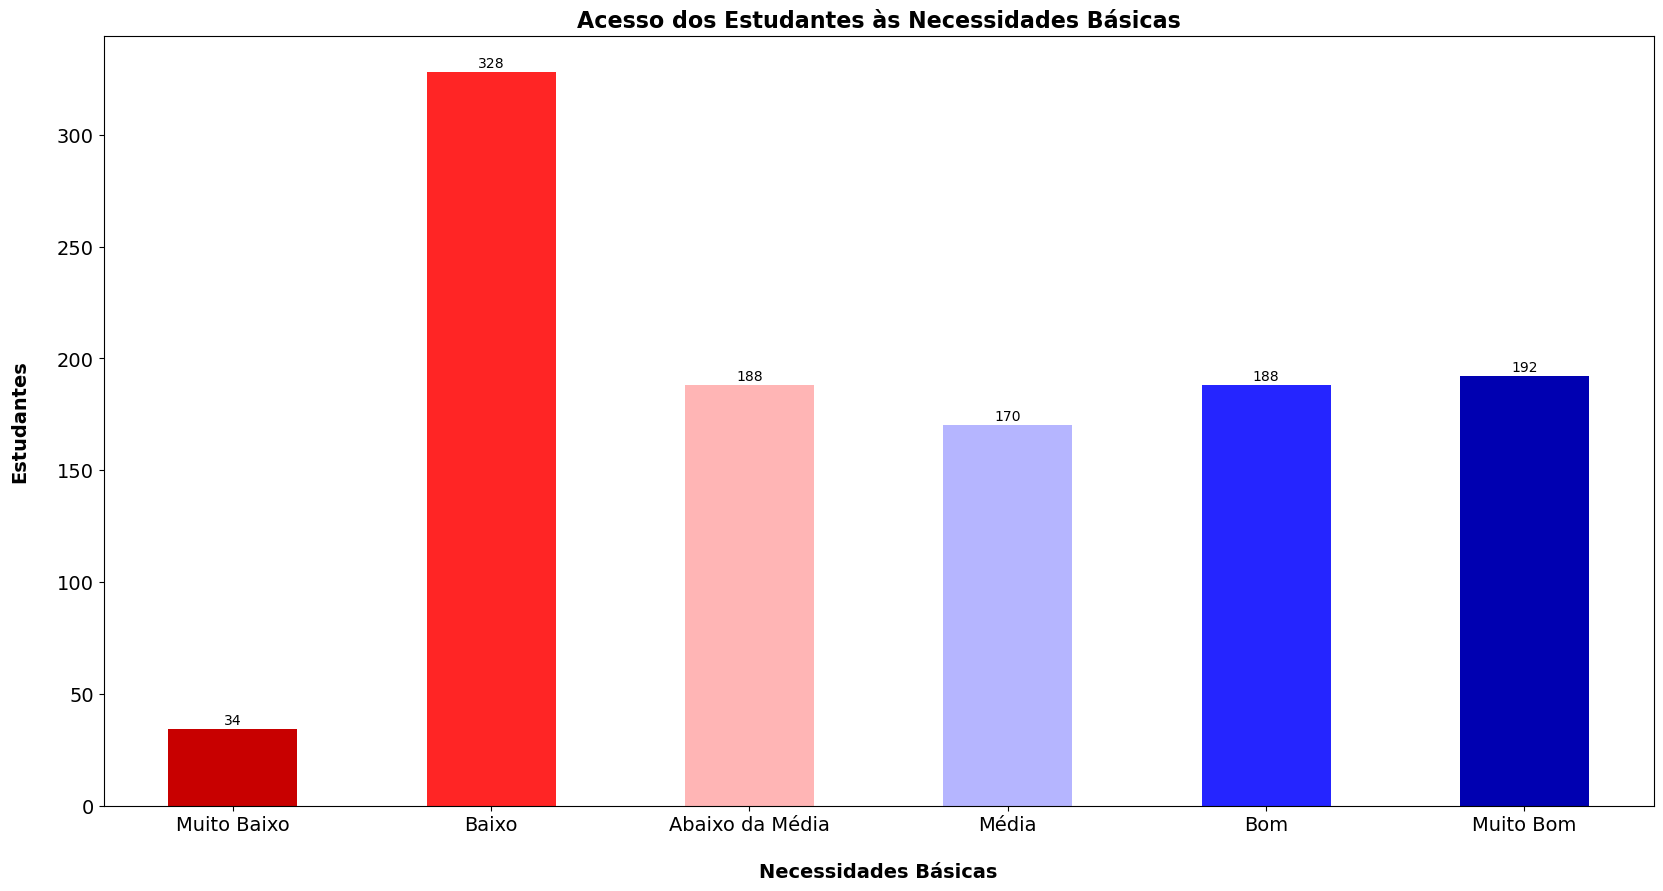

In [34]:
# Visualizando em forma de gráfico
plt.figure(figsize=(20,10))

necessidades_basicas = df['sleep_quality'].value_counts().sort_index().plot(kind='bar', color = sns.color_palette('seismic_r', 6), rot = 0)
necessidades_basicas.set_xticklabels(('Muito Baixo', 'Baixo', 'Abaixo da Média', 
                                           'Média', 'Bom', 'Muito Bom'))

for p in necessidades_basicas.patches:
    necessidades_basicas.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    necessidades_basicas.tick_params(axis='both', labelsize=14)

plt.xlabel('Necessidades Básicas', weight = 'bold', fontsize=14, labelpad=20)
plt.ylabel('Estudantes', weight='bold', fontsize=14, labelpad=20)
plt.title('Acesso dos Estudantes às Necessidades Básicas', weight='bold', fontsize=16)

Ao olharmos o gráfico podemos perceber que um alto número de estudantes possuem um baixo acesso às necessidades básicas, e quando somado com os outros índices de pouco acesso, quase metade dos estudantes tem tido problemas nesse fator, o que pode aumentar o estresse dos mesmos.

## Fatores Acadêmicos

Nesta categoria, iremos analisar as colunas que dizem respeito à performance acadêmica e às preocupações com a carreira futura.

### Quantos estudantes avaliam sua performance acadêmica como abaixo da média?

In [35]:
# Encontrando a média
media_perf_academica = df['academic_performance'].mean()
media_perf_academica

2.772727272727273

In [36]:
# Indentificando quantos alunos consideram a sua performance abaixo da média
df_baixa_performance = df[df['academic_performance'] < media_perf_academica]
performance_abaixo_media = len(df_baixa_performance)
print(f'A quantidade de estudantes que afirmam ter uma performance acadêmica abaixo da média é igual a {performance_abaixo_media}')

A quantidade de estudantes que afirmam ter uma performance acadêmica abaixo da média é igual a 561


### Quantos estudantes dizem ter preocupações com o futuro de suas carreiras?

In [37]:
# Identificando quantos estudantes se encaixam na questão acima

estudantes_preocupados_carreiras = df[df['future_career_concerns'] == 1]
numero_estudantes_preocupados_carreiras = len(estudantes_preocupados_carreiras)
print(f'O número de estudantes que dizem se preocupar com o futuro de sua carreiras é de {numero_estudantes_preocupados_carreiras}')

O número de estudantes que dizem se preocupar com o futuro de sua carreiras é de 327


## Fatores Sociais

Para a última categoria, um dos fatores de maior interesse é sobre o bullying, que é uma grande realidade no cotidiano de muitos estudantes, e por consequência, pode aumentar os níveis de preocupação e estresse. Através da nossa análise, seremos capazes de identificar quantos indivíduos tiveram que lidar com essa situação.

### Bullying

In [38]:
# Categorização
df['sofreram_bullying'] = df['bullying'].apply(lambda x: 'Sofreram Bullying' if x <= 3 else 'Não Sofreram')

In [39]:
ocorrencias_bullying = df['sofreram_bullying'].value_counts() 
porcentagem_bullying = (ocorrencias_bullying/len(df))*100

print('Porcentagem de estudantes que sofreram bullying:')
print(porcentagem_bullying)

Porcentagem de estudantes que sofreram bullying:
sofreram_bullying
Sofreram Bullying    67.272727
Não Sofreram         32.727273
Name: count, dtype: float64


O bullying é um fator com altos índices e que pode ser um ótimo assunto para uma futura análise mais profunda.

Para uma maior clareza, abaixo, iremos visualizar esses dados em forma de gráfico

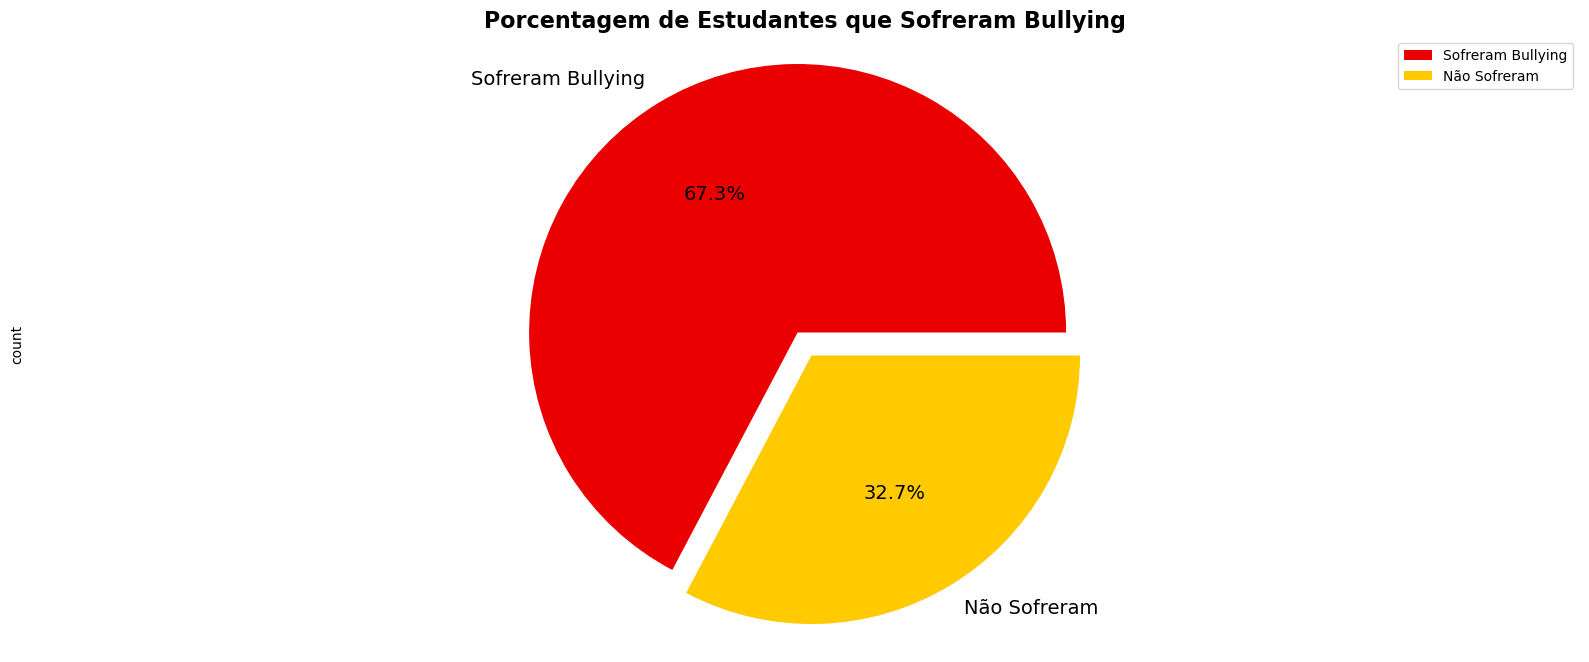

In [40]:
plt.figure(figsize=(20,8))
espaco = (0, 0.1)
legenda = ['Sofreram Bullying', 'Não Sofreram']

ocorrencias_bullying = df['sofreram_bullying'].value_counts() 
porcentagem_bullying = (ocorrencias_bullying/len(df))*100

porcentagem_bullying.plot(kind='pie', fontsize= 14, colors = sns.color_palette('hot', 2), explode = espaco, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Porcentagem de Estudantes que Sofreram Bullying', weight = 'bold', fontsize= 16)
plt.legend(labels = legenda, loc = 'best')
plt.show()

## Análise Comparativa

Para finalizar nossa análise, iremos comparar alguns dados como, por exemplo, a correlação entre o nível de ansiedade e a performance acadêmica.

### Há alguma correlação entre os níveis de ansiedade e a performance acadêmica dos estudantes? E entre a qualidade de sono e a depressão?

In [41]:
# Identificando se há alguma correlação entre os fatores de ansiedade e performance acadêmica
correlacao_ansiedade_perf = df['anxiety_level'].corr(df['academic_performance'])
correlacao_ansiedade_perf

-0.6496011296145088

In [42]:
# Correlação entre a qualidade de sono e a depressão
correlacao_sono_depressao = df['sleep_quality'].corr(df['depression'])
correlacao_sono_depressao

-0.6931609071393334

A correlação é a forma em que podemos calcular se há e qual o grau de dependência entre duas variáveis, isso quer dizer que, estamos tentando entender o quanto uma variável interfere na outra, mesmo que não haja um fator de causalidade entre elas. No caso das variáveis que testamos existe uma correlação moderada, mesmo que de forma negativa, já que os índices retornados estão entre 0,5 e 0,7. 

Abaixo iremos visualizar um mapa de calor com as correlações entre as variáveis que usamos anteriormente e também entre outras, para verificarmos se identificamos qualquer outra correlação.

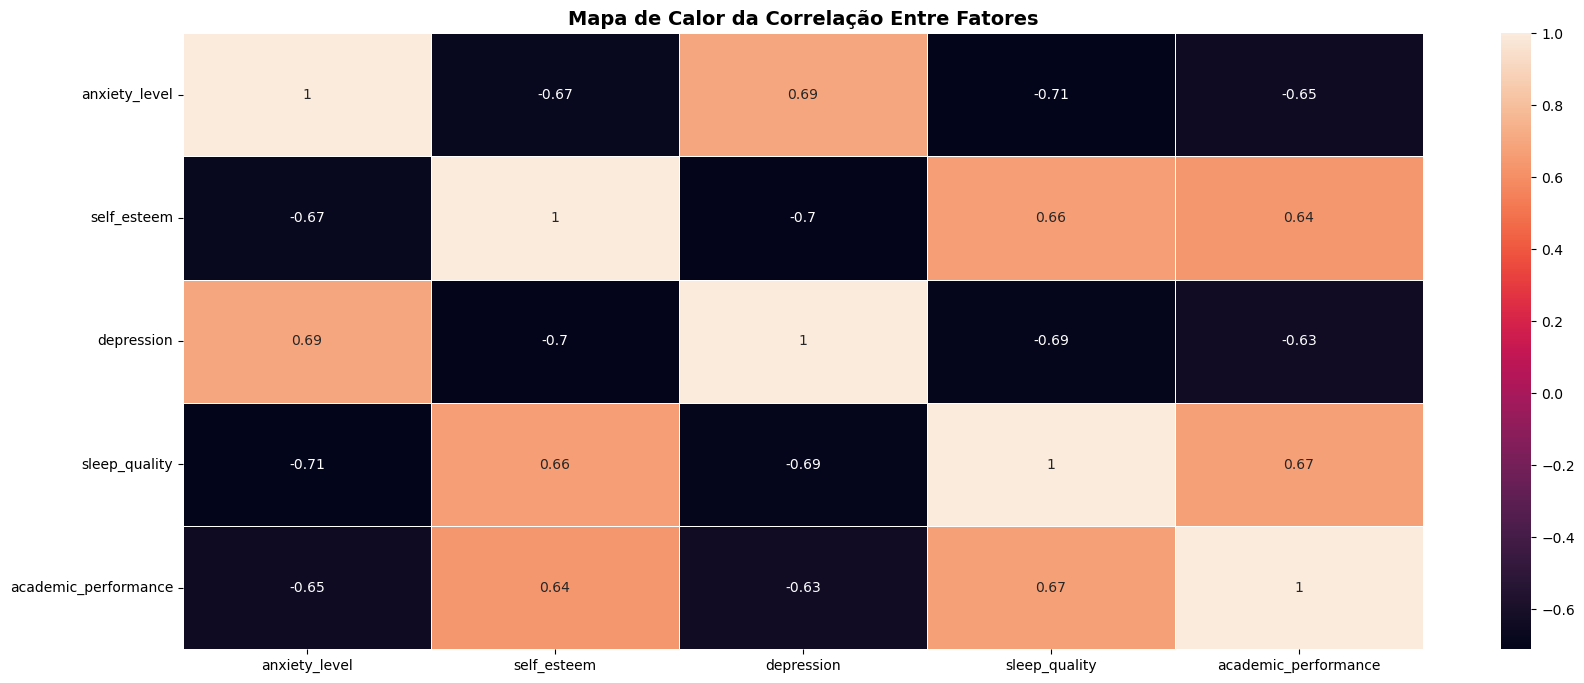

In [43]:
# Mapa de Calor para Correlação
matriz_correlacao = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='rocket', linewidths=0.5)
plt.title("Mapa de Calor da Correlação Entre Fatores", weight='bold', fontsize=14)
plt.show()

Com o mapa de calor podemos observar de forma mais fácil as correlações negativas e positivas. As negativas são aquelas em que quando uma variável aumenta, a outra diminui. Já nas correlações positivas, as duas variáveis crescem ou diminuem juntas. As correlações positivas no mapa de calor são moderadas, mas já nos ajudam a entender a relação entre alguns fatores, como, por exemplo, entre a depressão e a ansiedade.

### Os estudantes que já sofreram bullying são mais propensos a terem um histórico de doenças da mente?

In [44]:
# Porcentagem de alunos que sofreram bullying e possuem histórico de doenças da mente
estudantes_bullying = df[df['bullying'] <= 3]
estudantes_bullying_hist_mente = estudantes_bullying[estudantes_bullying['mental_health_history'] == 1]
porcentagem_bullying_mente = (len(estudantes_bullying_hist_mente) / len(estudantes_bullying)) * 100
print(f'A porcentagem de estudantes que sofreram bullying e possuem histórico de doenças da mente é igual a {porcentagem_bullying_mente}')

A porcentagem de estudantes que sofreram bullying e possuem histórico de doenças da mente é igual a 28.64864864864865


Nesta análise apenas 28.64% do estudantes que já sofreram bullying afirmam ter algum histórico de doença da mente. O número é baixo, mas "positivo" para o conjunto de dados com que estamos trabalhando.

## Conclusão

Com o conjunto de dados, disponibilizado via Kaggle, foi possível fazer uma análise exploratória sobre os fatores que podem estar associados ao estresse dos estudantes. Mesmo sendo um conjunto mais simples, e a análise também sendo simples, identificamos desde o nível de ansiedade dos estudantes, até o histórico de bullying. Mais adiante foi possível observar a correlação entre alguns fatores como, a depressão e a ansiedade. 

O impacto do cotidiano, e dos problemas vivenciados, na vida dos estudantes podem causar estresse, doenças relacionadas à mente, e problemas de saúde a longo prazo associados aos altos níveis de emoções, como o próprio estresse e a preocupação. A geração atual é a que mais procura ajuda psicológica para lidar com os traumas e problemas vivenciados em casa, na escola/universidade, na internet e na própria mente que, por muitas vezes, os fazem acreditar que não são suficientes e capazes, ou que não estão atingindo as expectativas que foram impostas.

Olhando novamente os gráficos e informações coletadas, conseguimos identificar muitos desses fatores em um número alto, sendo necessário, olharmos para o estudante de forma mais atenta e buscar ajudá-los para que eles possam ser mais saudáveis e possam ter uma vida feliz.